In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

#Models de clasificació
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

#Preprocessament
from sklearn.preprocessing import StandardScaler

## - Exercici 1

Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [2]:
df = pd.read_csv('wineData.txt', header=None)
df.columns = ["Class","Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280/OD315_of_diluted_wines", "Proline"]
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [4]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.Class.value_counts().sort_values(ascending=True)

3    48
1    59
2    71
Name: Class, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='count'>

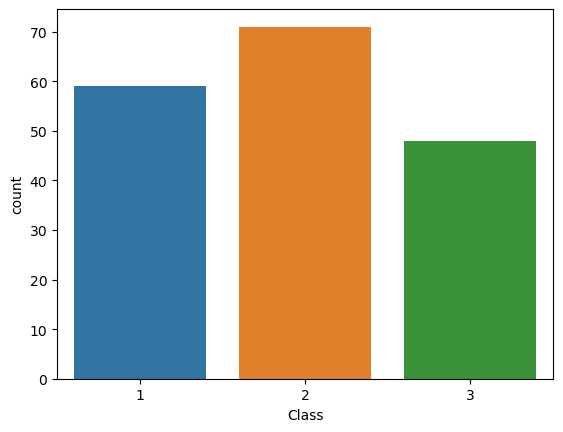

In [6]:
sns.countplot(df, x= "Class")

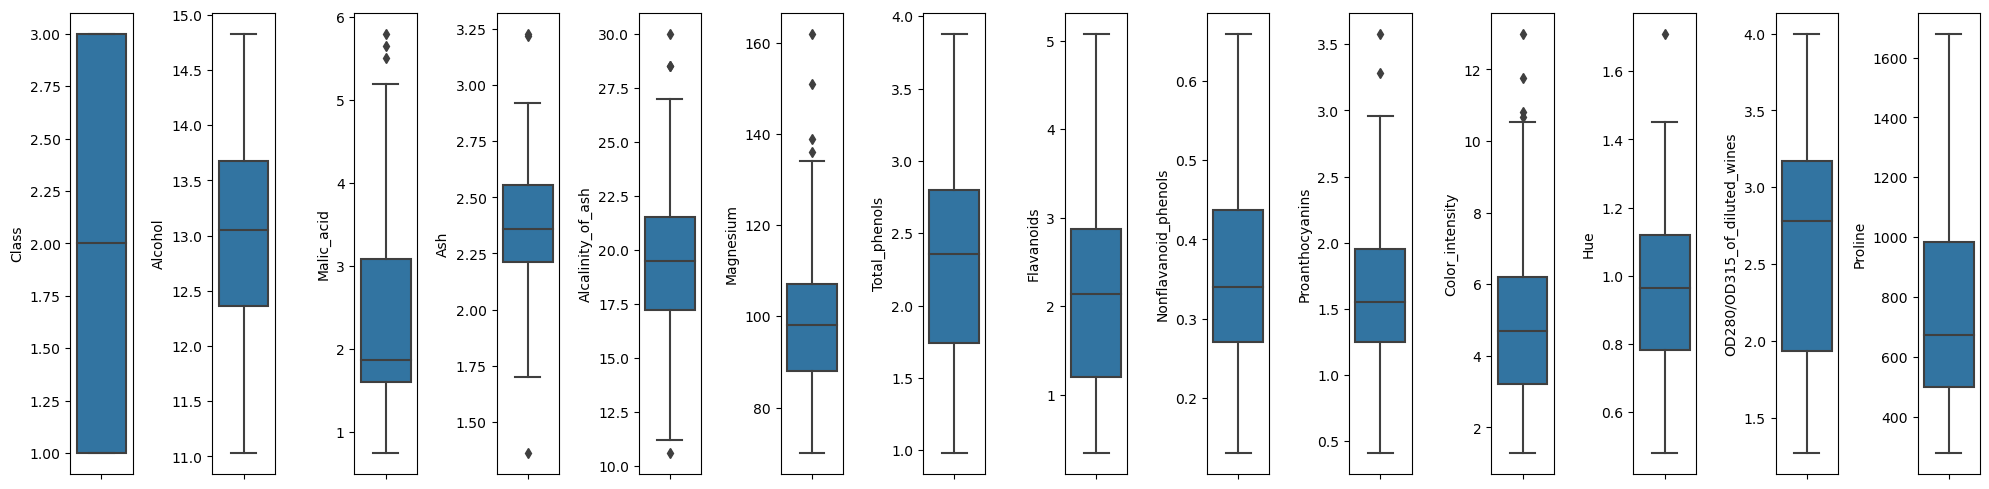

In [7]:
fig, axs = plt.subplots(ncols=14, nrows=1, figsize=(20, 5))
index = 0
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(h_pad=5.0)

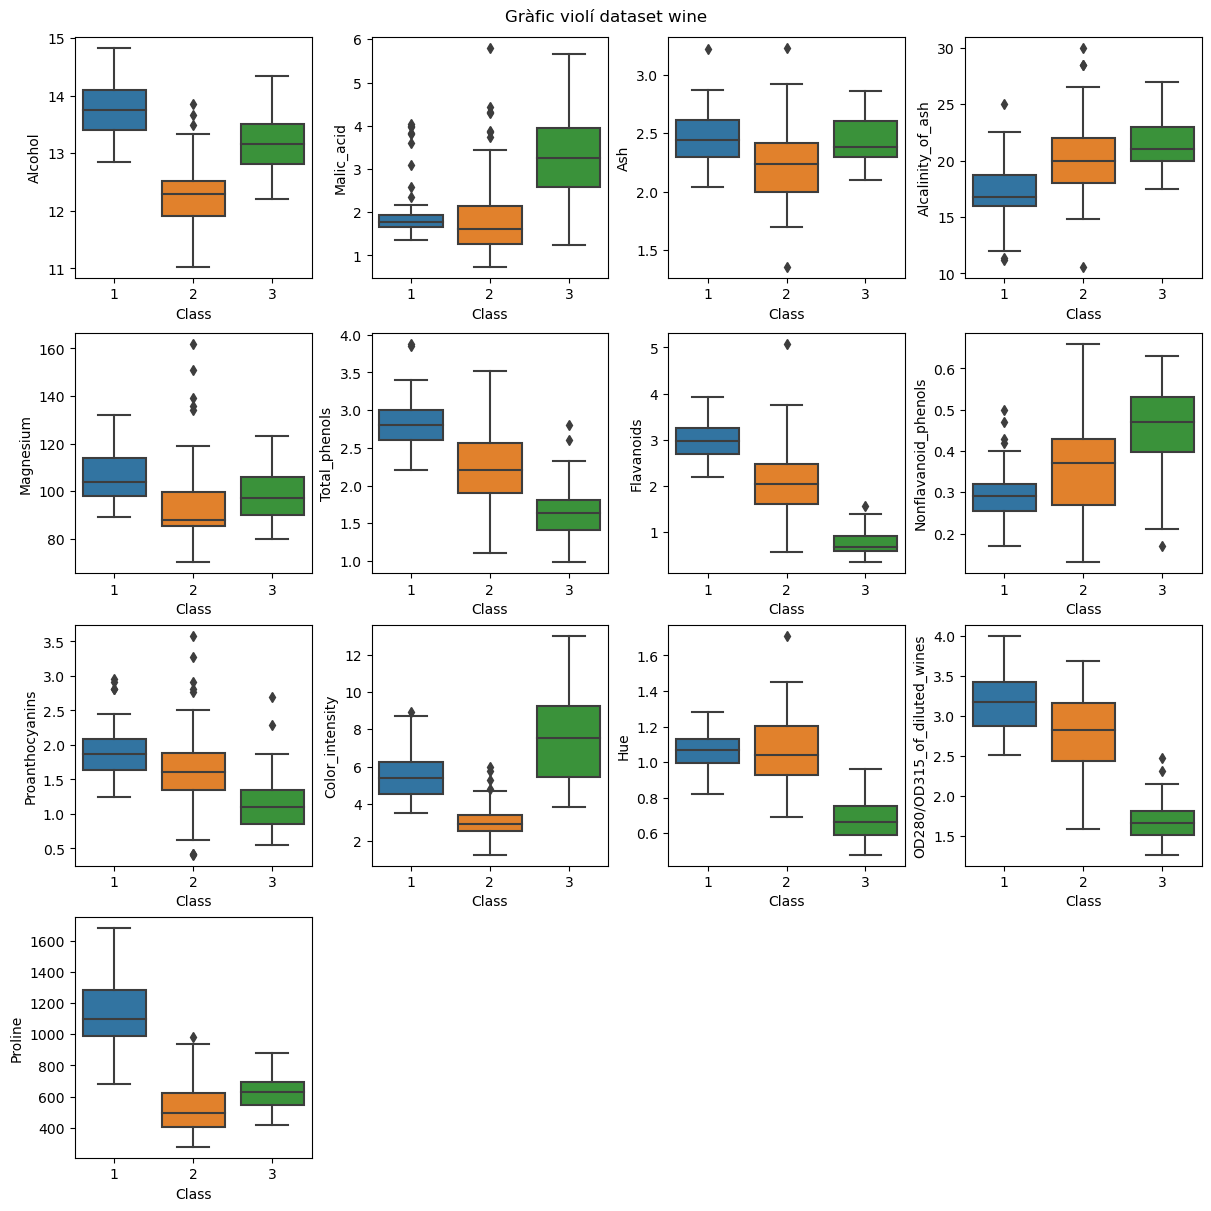

In [8]:
col=df.drop('Class',axis='columns').columns

fig,axs =plt.subplots(4,4, figsize=(12,12),layout='constrained')
axs=axs.flat
fig.suptitle('Gràfic violí dataset wine')

for count,elem in enumerate(col):
    sns.boxplot(
        data = df,
        x    = 'Class',
        y    = elem,
        ax   = axs[count])

for i in [13,14,15]:
    fig.delaxes(axs[i])

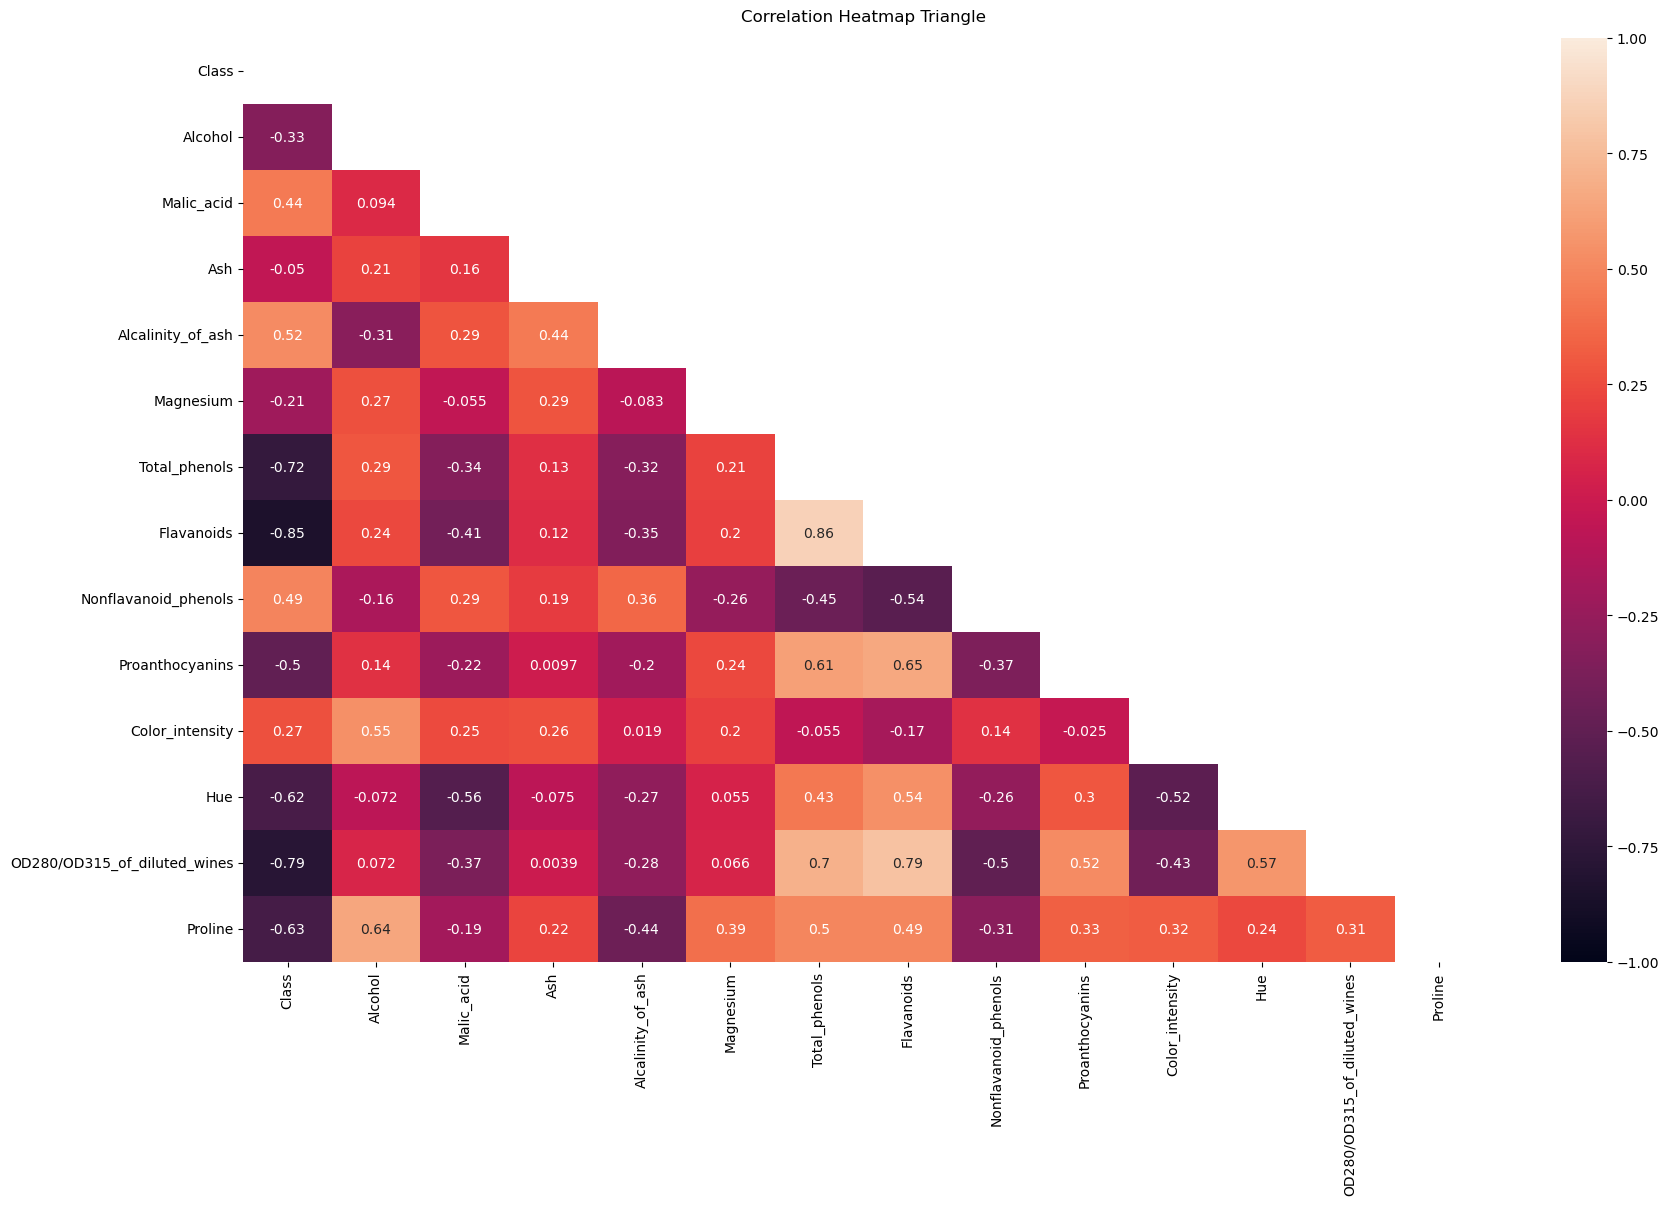

In [9]:
plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask= np.triu(df.corr()))
heatmap.set_title('Correlation Heatmap Triangle', fontdict={'fontsize':12}, pad=12);

### Train/Test i estandarització:

In [10]:
X = df.drop(['Class'], axis=1) 
y = df['Class']

#test el 30% i la train el 70%
X_train, X_test, y_train, y_test=train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        shuffle = True, # el dataset aleatori
                                        stratify = df['Class'],   # proporcions similars
                                        random_state=25
                                        )

In [11]:
llista = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
        'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline'] 
scaler= StandardScaler()
X_train_tra = scaler.fit_transform(X_train)
X_test_tra = scaler.transform (X_test)
X_train_tra=pd.DataFrame(X_train_tra, columns=llista)
X_test_tra=pd.DataFrame(X_test_tra, columns=llista)
X_train_tra

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,-1.140274,-0.169336,-2.483756,-0.570123,-0.151917,-0.087840,0.180998,-0.891851,-0.375597,-0.719522,1.239160,0.484446,-0.111818
1,-0.208922,0.620320,0.986183,1.479472,0.126131,0.065092,-1.445061,1.318303,-1.399392,-0.045467,-0.390276,-0.671870,-0.486477
2,1.629273,-0.528271,1.329364,1.794794,-0.082405,0.880731,-0.709709,1.318303,1.880223,3.316487,-1.762433,-0.943104,-0.267926
3,0.477338,2.091952,1.939463,1.794794,0.890762,-0.512652,-1.072207,-0.809994,-0.878818,1.444111,-1.333634,-1.000206,-0.361591
4,-1.961334,-1.371767,0.566740,0.533505,-0.777525,0.336972,0.015285,0.417870,-0.306187,-0.811061,0.510202,-0.443462,-0.973533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1.482218,-0.510324,-0.195884,-0.948510,1.307833,1.560431,1.040634,-0.891851,0.717608,0.562015,-0.175877,0.984089,0.699941
120,-1.238311,-0.680818,0.261691,0.848827,-0.916549,-1.413254,-0.771852,1.072730,0.023510,-0.594697,0.295802,0.041906,-0.923578
121,0.085189,1.463816,0.032904,0.691166,0.960274,-1.481224,-0.626853,-0.236991,-0.826761,1.818586,-1.762433,-1.842461,-0.611363
122,-0.270195,0.360092,0.490478,0.848827,0.890762,-1.362276,-0.657924,-1.055567,-0.618531,2.401103,-2.148352,-1.642604,-0.829913


### KNN i Random Forest Classifier:

In [12]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)
prediction_kn = kn.predict(X_test)
prediction_kn

C:\Users\ingbg\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 1, 3, 3, 2, 1, 3, 3, 2, 3, 2, 2, 1,
       3, 2, 2, 2, 1, 2, 1, 3, 1, 2, 3, 3, 2, 2, 3, 1, 3, 1, 3, 2, 3, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 1], dtype=int64)

In [13]:
rf = RandomForestClassifier(random_state = 15)
rf.fit(X_train,y_train)

prediction_rf = rf.predict(X_test)
prediction_rf

array([1, 2, 3, 1, 1, 3, 3, 2, 1, 1, 2, 2, 3, 2, 1, 3, 2, 3, 2, 2, 2, 3,
       1, 2, 3, 3, 1, 2, 1, 2, 1, 2, 3, 2, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1,
       3, 1, 1, 2, 1, 1, 2, 3, 2, 1], dtype=int64)

## - Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

In [14]:
accuracy_rf = metrics.accuracy_score(y_test, prediction_rf)
accuracy_kn = metrics.accuracy_score(y_test, prediction_kn)

In [15]:
accuracy = pd.DataFrame( 
    data = [('Random Forest Classifier', accuracy_rf),
            ('KNeighborsClassifier', accuracy_kn)],
            columns = ['Model', 'Accuracy'])
accuracy

,Model,Accuracy
0,Random Forest Classifier,0.925926
1,KNeighborsClassifier,0.685185


Claramente Random Forest és molt més precís

In [16]:
cm_rf = metrics.confusion_matrix(y_test, prediction_rf)

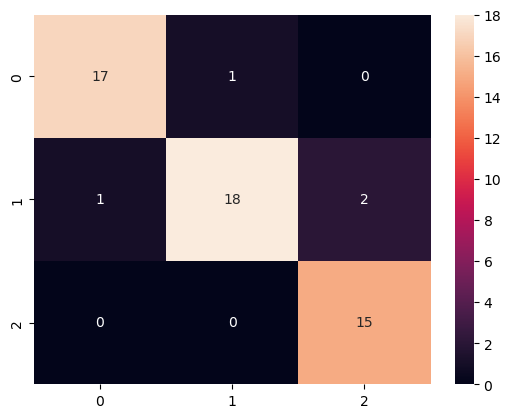

              precision    recall  f1-score   support

           1      0.944     0.944     0.944        18
           2      0.947     0.857     0.900        21
           3      0.882     1.000     0.938        15

    accuracy                          0.926        54
   macro avg      0.925     0.934     0.927        54
weighted avg      0.928     0.926     0.925        54



In [17]:
clases_nombres =['Clase 1', 'Clase 2', 'Clase 3']

cm_rf = pd.DataFrame(metrics.confusion_matrix(y_test, prediction_rf))

sns.heatmap(cm_rf, annot=True)

plt.show()

print(metrics.classification_report(y_test, prediction_rf, digits=3))

In [18]:
cm_kn = metrics.confusion_matrix(y_test, prediction_kn)

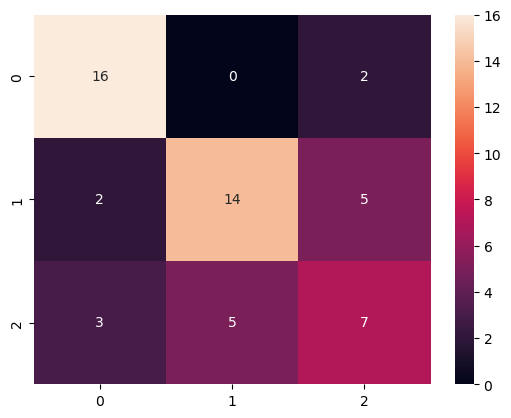

              precision    recall  f1-score   support

           1       0.76      0.89      0.82        18
           2       0.74      0.67      0.70        21
           3       0.50      0.47      0.48        15

    accuracy                           0.69        54
   macro avg       0.67      0.67      0.67        54
weighted avg       0.68      0.69      0.68        54



In [19]:
clases_nombres =['Clase 1', 'Clase 2', 'Clase 3']

cm_kn = pd.DataFrame(metrics.confusion_matrix(y_test, prediction_kn))

sns.heatmap(cm_kn, annot=True)

plt.show()

print(metrics.classification_report(y_test, prediction_kn))

En la matriu de confusió i mètriques s'observa molt bon resultats en el RF. On només s'han comès 4 errors de predicció.

In [20]:
kappa_rf = metrics.cohen_kappa_score(y_test, prediction_rf)
kappa_kn = metrics.cohen_kappa_score(y_test, prediction_kn)

In [21]:
kappa = pd.DataFrame( 
    data = [('Random Forest Classifier', kappa_rf),
            ('KNeighborsClassifier', kappa_kn)],
            columns = ['Model', 'Cohen Kappa'])

kappa

,Model,Cohen Kappa
0,Random Forest Classifier,0.888545
1,KNeighborsClassifier,0.524106


El Cohen's Kappa Coeficient ens indica l'efecte de l'atzar. On s'observa que és perfecte en el cas de RF.

## - Exercici 3

Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

In [42]:
model = rf

hyperparameters = dict()
hyperparameters['n_estimators'] = [100, 150, 200, 300, 400, 600, 1200]
hyperparameters['random_state'] = [1, 2, 3, 5, 9]
hyperparameters['criterion'] = ['gini', 'entropy', 'log_loss']

search = GridSearchCV(model, hyperparameters, scoring='accuracy', n_jobs=-1, cv=10)

result = search.fit(X, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9888888888888889
Best Hyperparameters: {'criterion': 'gini', 'n_estimators': 150, 'random_state': 2}


C:\Users\ingbg\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
350 fits failed out of a total of 1050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
350 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ingbg\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ingbg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ingbg\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ingbg\anaconda3\lib\site-package

In [43]:
rf2 = RandomForestClassifier(criterion= 'gini', n_estimators= 150, random_state= 2)
rf2.fit(X_train,y_train)
prediction_rf2 = rf2.predict(X_test)

accuracy_rf2 = metrics.accuracy_score(y_test, prediction_rf2)
kappa_rf2 = metrics.cohen_kappa_score(y_test, prediction_rf2)

In [44]:
rf_comp = pd.DataFrame( data = [('Random Forest Classifier Original', accuracy_rf, kappa_rf), 
                                  ('Random Forest Classifier Parametros', accuracy_rf2, kappa_rf2),],
                         columns = ['Model', 'Accuracy', 'Cohen Kappa'])
rf_comp

,Model,Accuracy,Cohen Kappa
0,Random Forest Classifier Original,0.925926,0.888545
1,Random Forest Classifier Parametros,0.962963,0.944186


En el cas del RF, afegint els millors paràmetres trobats: (criterion= 'gini', n_estimators= 150, random_state= 2) ha millorat encara una mica més. Amb un resultat del 96,3% de precisió.

In [50]:
model = kn #Aprofitant el model KNN anterior

hyperparameters = dict()
hyperparameters['n_neighbors'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 21]
hyperparameters['leaf_size'] = [1, 2, 3, 5, 10, 15, 20]
hyperparameters['weights'] = ['uniform', 'distance']

search = GridSearchCV(model, hyperparameters, scoring='accuracy', n_jobs=-1, cv=10)

result = search.fit(X, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7480392156862745
Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}


In [51]:
kn2 = KNeighborsClassifier(n_neighbors=1 , leaf_size = 1, weights = "uniform")
kn2.fit(X_train, y_train)
prediction_kn2 = kn2.predict(X_test)

accuracy_kn2 = metrics.accuracy_score(y_test, prediction_kn2)
kappa_kn2 = metrics.cohen_kappa_score(y_test, prediction_kn2)

C:\Users\ingbg\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
accuracy_kn2.round(3)

0.685

Amb els millors paràmetres trobats pel KNN ha millorat la precisió, ja que abans era 0,52.

## - Exercici 4

Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [55]:
cv_rf = cross_val_score(estimator = rf, X = X, y = y, cv = 10)
cv_kn = cross_val_score(estimator = kn, X = X, y = y, cv = 10)
cv_rf2 = cross_val_score(estimator = rf2, X = X, y = y, cv = 10)
cv_kn2 = cross_val_score(estimator = kn2, X = X, y = y, cv = 10)

C:\Users\ingbg\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ingbg\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [57]:
cv_comp = pd.DataFrame( data = [('Random Forest Classifier Original', cv_rf.mean()),
                                ('Random Forest Classifier Parametros', cv_rf2.mean()),
                                ('KNeighborsClassifier Original', cv_kn.mean()),
                                ('KNeighborsClassifier Parametros', cv_kn2.mean())],
                         columns = ['Model', 'Cross-validation'])

cv_comp = cv_comp.sort_values(by=['Cross-validation'], ascending=False)
cv_comp

,Model,Cross-validation
1,Random Forest Classifier Parametros,0.988889
0,Random Forest Classifier Original,0.983333
3,KNeighborsClassifier Parametros,0.748039
2,KNeighborsClassifier Original,0.675490


Fent cross-validation tots els resultats han millorat en general. RF amb els paràmetres ajustats és el millor resultat amb 98,89% d'encerts en la predicció (vs el 96% sense el CV). Molt bon resultat.

## - Exercici 5

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

In [58]:
perm_importance = permutation_importance(rf2, X_test, y_test)
perm_importance.importances_mean

array([0.07407407, 0.01111111, 0.01851852, 0.02222222, 0.01481481,
       0.01851852, 0.04074074, 0.0037037 , 0.00740741, 0.04074074,
       0.01851852, 0.02222222, 0.0962963 ])

,Value
Nonflavanoid_phenols,0.003704
Proanthocyanins,0.007407
Malic_acid,0.011111
Magnesium,0.014815
Ash,0.018519
Total_phenols,0.018519
Hue,0.018519
Alcalinity_of_ash,0.022222
OD280/OD315_of_diluted_wines,0.022222
Flavanoids,0.040741


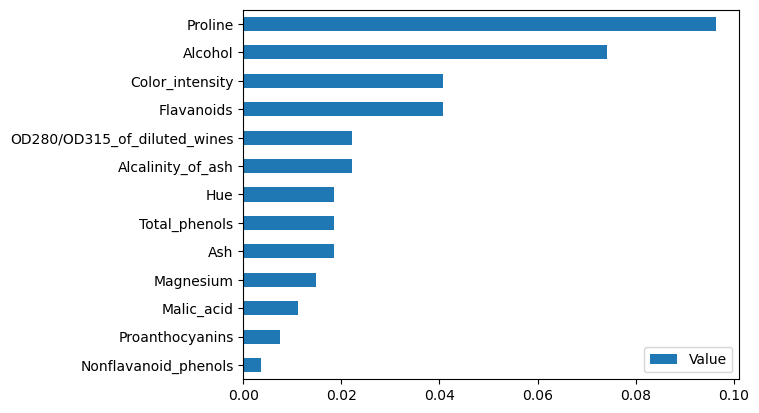

In [59]:
sorted_idx = perm_importance.importances_mean.argsort()
df_importance = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df_importance.plot.barh()
df_importance

In [65]:
# Eliminem del dataset les columnes de menys pes
unuseful_columns = df_importance[df_importance["Value"] < 0.01]
unuseful_columns = unuseful_columns.transpose()

X_train_ColumnsOptimized = X_train.drop(unuseful_columns, axis=1)
X_test_ColumnsOptimized = X_test.drop(unuseful_columns, axis=1)

unuseful_columns

,Nonflavanoid_phenols,Proanthocyanins
Value,0.003704,0.007407


In [69]:
rfopt = RandomForestClassifier(criterion= 'gini', n_estimators= 200, random_state= 2)
rfopt.fit(X_train_ColumnsOptimized, y_train)
prediction_rfopt = rfopt.predict(X_test_ColumnsOptimized)

accuracy_rfopt = metrics.accuracy_score(y_test, prediction_rfopt)
kappa_rfopt = metrics.cohen_kappa_score(y_test, prediction_rfopt)
cv_rfopt = cross_val_score(estimator = rfopt, X = X_train, y = y_train, cv = 10)

accuracy_rfopt, kappa_rfopt, cv_rfopt.mean()

(0.9444444444444444, 0.9165378670788253, 1.0)

In [70]:
rf_opt = pd.DataFrame( data = [('Random Forest Classifier Optimized', accuracy_rfopt, kappa_rfopt, cv_rfopt.mean() ), 
                                  ('Random Forest Classifier Parametros', accuracy_rf2, kappa_rf2, cv_rf2.mean() )],
                         columns = ['Model', 'Accuracy', 'Cohen Kappa', 'Cross-validation'])
rf_opt

,Model,Accuracy,Cohen Kappa,Cross-validation
0,Random Forest Classifier Optimized,0.944444,0.916538,1.000000
1,Random Forest Classifier Parametros,0.962963,0.944186,0.988889
